In [1]:
using Plots, Random, Distributions, DataFrames

## 元の確率変数
ここでは、便宜上、元の確率変数$x$は、1から6までの間で連続一様分布(continuous uniform distribution)に従うものとします。

In [2]:
# 分布を指定
d = Uniform(1, 6)

Uniform{Float64}(a=1.0, b=6.0)

In [3]:
# 確率変数xの実現値について1000万回シミュレーション
Random.seed!(0)
x = rand(d, 10000000)

10000000-element Array{Float64,1}:
 5.118237539887062
 5.551782689632182
 1.822828990668426
 1.8866442323313228
 2.394400546656005
 2.0173827902096133
 1.2115083296601483
 1.3413462775282239
 2.8091419538810873
 5.866082021932554
 3.9290577587166213
 3.696446420713091
 2.3001792513452393
 ⋮
 1.6568631594574659
 1.0986283011806843
 1.2479988310892767
 2.6074734702069504
 3.4564703524760745
 2.6863151951376754
 1.6903676418347116
 1.5162389892743946
 4.986004256352209
 1.537151954147882
 2.9020065339545242
 1.6767542741896315

In [4]:
# シミュレーション結果の記述統計量
describe(x)

Summary Stats:
Length:         10000000
Missing Count:  0
Mean:           3.499920
Minimum:        1.000001
1st Quartile:   2.249959
Median:         3.499052
3rd Quartile:   4.750298
Maximum:        5.999999
Type:           Float64


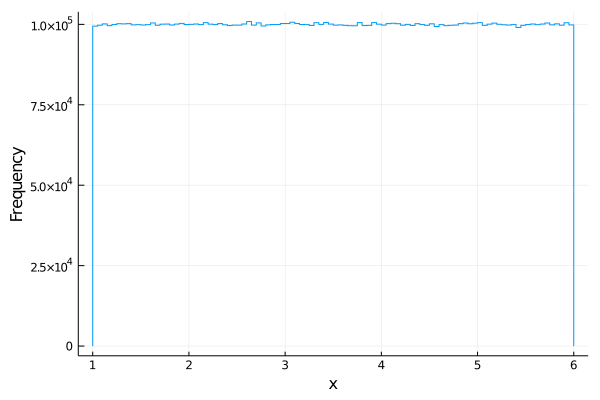

In [5]:
# シミュレーション結果の分布: 概ね連続一様分布です。
histogram(x, label = false, xlabel = "x", ylabel = "Frequency")

## 期待値を確率変数で割ると確率になるか？

下記の結果からわかるように、どうみても「確率」ではありませんね。200％大丈夫です、というのは比喩表現としてはあるかもしれませんが、確率は0~1しかとらない数なので（注:確率の定義の構成要素のうちの一つです。）、確率の定義を満たしません。というか、何を表す数なのかもはや謎です… 平均が1にならない点($E[E[x]/x] \neq E[x]/E[x]$)、また分布が元のxの分布とは異なる点に注意して下さい。

$$
    E[x] = \int_{-\infty}^{+\infty} x \frac{1}{6-1} dx = \frac{1}{5} \int_{1}^{6} {x} dx = 3.5 \\
    E\left[\frac{E[x]}{x}\right] = E\left[\frac{3.5}{x}\right] = 3.5 \int_{1}^{6} \frac{1}{5x} dx = 0.7 (\ln 6 - \ln 1) = 1.2542... 
$$


In [6]:
## 「期待値を確率変数で割った数」の定義
ikenobu = 3.5 ./ x

10000000-element Array{Float64,1}:
 0.683829144842158
 0.6304281337481318
 1.9200923498131113
 1.8551457344319
 1.4617437357705518
 1.7349211151128823
 2.8889607395285664
 2.6093187558172164
 1.2459320523708062
 0.5966503684936443
 0.8907988161373408
 0.9468553312142439
 1.521620542378624
 ⋮
 2.1124255072133193
 3.1857908596006372
 2.804489806248564
 1.342295536269526
 1.0125936701562455
 1.302899974781486
 2.0705554894562037
 2.3083432260734478
 0.701964904169701
 2.2769381976554297
 1.2060620674174012
 2.08736608212407

In [7]:
## 「期待値を確率変数で割った数」の記述統計量
describe(ikenobu)

Summary Stats:
Length:         10000000
Missing Count:  0
Mean:           1.254133
Minimum:        0.583333
1st Quartile:   0.736796
Median:         1.000271
3rd Quartile:   1.555584
Maximum:        3.499998
Type:           Float64


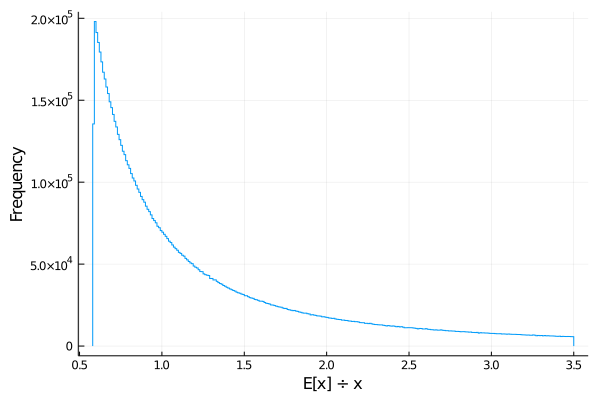

In [8]:
## 「期待値を確率変数で割った数」の分布
histogram(ikenobu, label = false, xlabel = "E[x] ÷ x", ylabel = "Frequency")